# **Linear** **Regression**

**1. Predict Delivery time using Sorting time**

Delivery_time.csv dataset

In [ ]:
#importing the dependencies
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
time_data=pd.read_csv('G:\Data science\ExcelR\Assignments\delivery_time.csv')
time_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
#Remove the space inbetween to avoid the syntax error while fitting the model
time_data=time_data.rename({'Delivery Time': 'Delivery_time'}, axis=1)
time_data=time_data.rename({'Sorting Time': 'Sorting_time'}, axis=1)
time_data.columns

Index(['Delivery_time', 'Sorting_time'], dtype='object')

In [ ]:
time_data.shape

(21, 2)

In [ ]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Delivery Time    21 non-null float64
Sorting Time     21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 376.0 bytes


In [ ]:
time_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


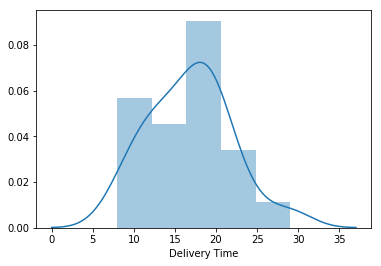

In [ ]:
sns.distplot(time_data['Delivery_time'])

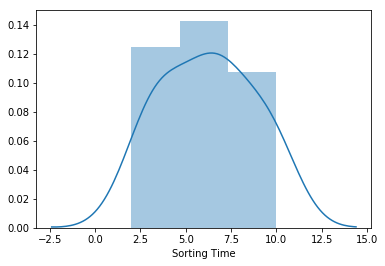

In [ ]:
sns.distplot(time_data['Sorting_time'])

Both Delivery time and Sorting time variables follow normal distribution

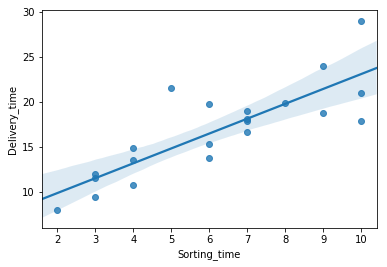

In [ ]:
sns.regplot(x='Sorting_time',y='Delivery_time',data=time_data)

**Linear Model**

In [ ]:
import statsmodels.formula.api as smf
lin_model=smf.ols("Delivery_time~Sorting_time",data=time_data).fit()

In [ ]:
lin_model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [ ]:
#t and p-Values
print(lin_model.tvalues, '\n', lin_model.pvalues)

Intercept       3.823349
Sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_time    0.000004
dtype: float64


In [ ]:
#R squared values
(lin_model.rsquared,lin_model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

**Predict for new data point**

In [ ]:
#Predict Delivery time for 5 and 9 Sorting time
newdata=pd.Series([5,9])

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_time'])
data_pred

,Sorting_time
0,5
1,9


In [ ]:
lin_model.predict(data_pred)

0    14.827833
1    21.423913
dtype: float64

The same linear model can be created by using linearRegression module from sklearn library

In [ ]:
#X is Independent var and y is dependant var
#Convert it to dataframe to fit the model
X=pd.DataFrame(time_data.iloc[:,1].values)
y=pd.DataFrame(time_data.iloc[:,0].values)

In [ ]:
#Fit the simple linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [ ]:
#Predicting the results
y_pred = regressor.predict([[5]])
y_pred

array([[14.82783346]])

In [ ]:
y_pred

array([[14.82783346]])

##2. Linear Regression model for Salary hike

Salary_data.csv dataset

In [ ]:
salary_data=pd.read_csv("G:\Data science\ExcelR\Assignments\Salary_Data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 520.0 bytes


In [ ]:
salary_data=salary_data.rename({'YearsExperience':'Years_experience'}, axis=1)
salary_data

,Years_experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
salary_data.corr()

,Years_experience,Salary
Years_experience,1.000000,0.978242
Salary,0.978242,1.000000


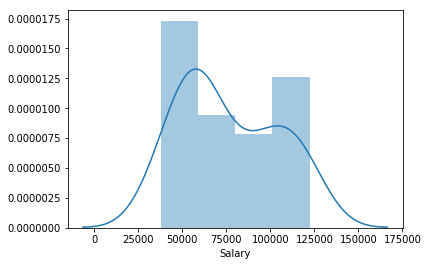

In [ ]:
sns.distplot(salary_data['Salary'])

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~Years_experience",data=salary_data).fit()

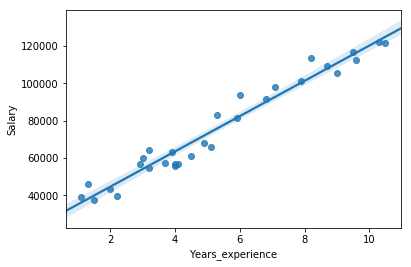

In [ ]:
sns.regplot(x='Years_experience',y='Salary',data=salary_data)

In [ ]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
#t and p-Values
print(model.tvalues, '\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)